In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook

import seaborn as sns

import numpy as np
import pandas as pd
import scipy.optimize

from datetime import datetime
import pytz

import trfp
import gm2

## Stolen from Stack Exchange
import time

def TicTocGenerator():
    # Generator that returns time differences
    ti = 0           # initial time
    tf = time.time() # final time
    while True:
        ti = tf
        tf = time.time()
        yield tf-ti # returns the time difference

TicToc = TicTocGenerator() # create an instance of the TicTocGen generator

# This will be the main function through which we define both tic() and toc()
def toc(tempBool=True):
    # Prints the time difference yielded by generator instance TicToc
    tempTimeInterval = next(TicToc)
    if tempBool:
        print( "Elapsed time: %f seconds.\n" %tempTimeInterval )

def tic():
    # Records a time in TicToc, marks the beginning of a time interval
    toc(False)

## end stolen segment

central_time = pytz.timezone('US/Central')

matplotlib.rc('xtick', labelsize=10)     
matplotlib.rc('ytick', labelsize=10)
matplotlib.rc('axes', titlesize=16)
matplotlib.rc('axes', labelsize=12)
plt.rcParams["font.family"] = "serif"

# sns.set(style="darkgrid")
# sns.set(rc={'figure.figsize':(7,4.33)})

Welcome to JupyROOT 6.12/04


In [2]:
tic()

# # Load data from root files
# tr6267 = trfp.TrolleyRun(6267)
# tr6268 = trfp.TrolleyRun(6268)
# tr6269 = trfp.TrolleyRun(6269)
# tr6270 = trfp.TrolleyRun(6270)
# tr6271 = trfp.TrolleyRun(6271)

# tr6267.interp_data.to_hdf('scc_study_dfs.h5', key='tr6267_interp_df')
# tr6268.interp_data.to_hdf('scc_study_dfs.h5', key='tr6268_interp_df')
# tr6269.interp_data.to_hdf('scc_study_dfs.h5', key='tr6269_interp_df')
# tr6270.interp_data.to_hdf('scc_study_dfs.h5', key='tr6270_interp_df')
# tr6271.interp_data.to_hdf('scc_study_dfs.h5', key='tr6271_interp_df')
# tr6267.moment_df.to_hdf('scc_study_dfs.h5', key='tr6267_moment_df')
# tr6268.moment_df.to_hdf('scc_study_dfs.h5', key='tr6268_moment_df')
# tr6269.moment_df.to_hdf('scc_study_dfs.h5', key='tr6269_moment_df')
# tr6270.moment_df.to_hdf('scc_study_dfs.h5', key='tr6270_moment_df')
# tr6271.moment_df.to_hdf('scc_study_dfs.h5', key='tr6271_moment_df')

# scc_moment_df = pd.concat([tr6267.moment_df,tr6268.moment_df,tr6269.moment_df,tr6270.moment_df,tr6271.moment_df])

tr6267_interp_df = pd.read_hdf('scc_study_dfs.h5', key='tr6267_interp_df')
tr6268_interp_df = pd.read_hdf('scc_study_dfs.h5', key='tr6268_interp_df')
tr6269_interp_df = pd.read_hdf('scc_study_dfs.h5', key='tr6269_interp_df')
tr6270_interp_df = pd.read_hdf('scc_study_dfs.h5', key='tr6270_interp_df')
tr6271_interp_df = pd.read_hdf('scc_study_dfs.h5', key='tr6271_interp_df')

scc_interp_df = pd.concat([tr6267_interp_df,tr6268_interp_df])

tr6267_interp_old_df = pd.read_hdf('scc_study_dfs_old.h5', key='tr6267_interp_df')
tr6268_interp_old_df = pd.read_hdf('scc_study_dfs_old.h5', key='tr6268_interp_df')
tr6269_interp_old_df = pd.read_hdf('scc_study_dfs_old.h5', key='tr6269_interp_df')
tr6270_interp_old_df = pd.read_hdf('scc_study_dfs_old.h5', key='tr6270_interp_df')
tr6271_interp_old_df = pd.read_hdf('scc_study_dfs_old.h5', key='tr6271_interp_df')

scc_interp_old_df = pd.concat([tr6267_interp_old_df,tr6268_interp_old_df])

tr6267_moment_df = pd.read_hdf('scc_study_dfs.h5', key='tr6267_moment_df')
tr6268_moment_df = pd.read_hdf('scc_study_dfs.h5', key='tr6268_moment_df')
tr6269_moment_df = pd.read_hdf('scc_study_dfs.h5', key='tr6269_moment_df')
tr6270_moment_df = pd.read_hdf('scc_study_dfs.h5', key='tr6270_moment_df')
tr6271_moment_df = pd.read_hdf('scc_study_dfs.h5', key='tr6271_moment_df')

scc_moment_df = pd.concat([tr6267_moment_df,tr6268_moment_df,tr6269_moment_df,tr6270_moment_df,tr6271_moment_df])

offset = 1.5514e9
scc_index = scc_moment_df.index
blank_mask = (~((scc_index > offset + 16750) & (scc_index < offset + 16860))&  # Run 6267 blanking
        ~((scc_index > offset + 17350) & (scc_index < offset + 17460))&
        ~((scc_index > offset + 17940) & (scc_index < offset + 18050))&
        ~((scc_index > offset + 18530) & (scc_index < offset + 18640))&
        ~((scc_index > offset + 19160) & (scc_index < offset + 19270))&
        ~((scc_index > offset + 19900) & (scc_index < offset + 20010))&
        ~((scc_index > offset + 20500) & (scc_index < offset + 20610))&
        ~((scc_index > offset + 21080) & (scc_index < offset + 21190))&
        ~((scc_index > offset + 21670) & (scc_index < offset + 21780))&
        
        ~((scc_index > offset + 22310) & (scc_index < offset + 22420))&  # Run 6268 blanking
        ~((scc_index > offset + 22900) & (scc_index < offset + 23010))&
        ~((scc_index > offset + 23490) & (scc_index < offset + 23600))&
        ~((scc_index > offset + 24080) & (scc_index < offset + 24190))&
        ~((scc_index > offset + 24710) & (scc_index < offset + 24820))&
        ~((scc_index > offset + 25300) & (scc_index < offset + 25410))&
        ~((scc_index > offset + 25900) & (scc_index < offset + 26010))&
        ~((scc_index > offset + 26500) & (scc_index < offset + 26610))&
        ~((scc_index > offset + 27120) & (scc_index < offset + 27230))&
       
        ~((scc_index > offset + 27720) & (scc_index < offset + 27800))&  # Run 6269 blanking, run started at ramp
        ~((scc_index > offset + 28310) & (scc_index < offset + 28420))&
        ~((scc_index > offset + 28930) & (scc_index < offset + 29040))&
        ~((scc_index > offset + 29530) & (scc_index < offset + 29640))&
        ~((scc_index > offset + 30120) & (scc_index < offset + 30230))&
        ~((scc_index > offset + 30740) & (scc_index < offset + 30850))&
        ~((scc_index > offset + 31340) & (scc_index < offset + 31450))&
        ~((scc_index > offset + 31920) & (scc_index < offset + 32030))&
        ~((scc_index > offset + 32550) & (scc_index < offset + 32660))&
        ~((scc_index > offset + 33140) & (scc_index < offset + 33250))&
       
        ~((scc_index > offset + 33730) & (scc_index < offset + 33840))&  # Run 6270 blanking
        ~((scc_index > offset + 34360) & (scc_index < offset + 34470))&
        ~((scc_index > offset + 34470) & (scc_index < offset + 34590)))

blanked_df = scc_moment_df[blank_mask]
blanked_index = blanked_df.index

study_1_df = blanked_df[(blanked_index < offset + 19910)].copy()
study_2_df = blanked_df[(blanked_index > offset + 19910) &
                        (blanked_index < offset + 23500)].copy()
study_3_df = blanked_df[(blanked_index > offset + 23500) &
                        (blanked_index < offset + 27130)].copy()
study_4_df = blanked_df[(blanked_index > offset + 27130) &
                        (blanked_index < offset + 30750)].copy()
study_5_df = blanked_df[(blanked_index > offset + 30750) &
                        (blanked_index < offset + 34470)].copy()
study_6_df = blanked_df[(blanked_index > offset + 34480)].copy()

toc()

Elapsed time: 0.441101 seconds.



In [ ]:
plt.figure()
sns.scatterplot(data=scc_interp_old_df['fp183']/61.79, edgecolor='none')
fig=plt.gcf()
fig.set_size_inches(12,4)
ax = plt.gca()
plt.ylim(904,915)  # fp183
# plt.ylim(814.5,815)  # tr0
plt.xlim(1551421900, 1551422100)
xticks = ax.get_xticks()
_ = ax.set_xticklabels([pd.to_datetime(tm, unit='s').tz_localize('UTC').tz_convert('US/Central').strftime('%Y-%m-%d\n %H:%M:%S %Z') 
                        for tm in xticks], rotation=0)


plt.figure()
sns.scatterplot(data=scc_interp_df['fp183']/61.79, edgecolor='none')
fig=plt.gcf()
fig.set_size_inches(12,4)
ax = plt.gca()
plt.ylim(904,915)  # fp183
# plt.ylim(814.5,815)  # tr0
plt.xlim(1551421900, 1551422100)
xticks = ax.get_xticks()
_ = ax.set_xticklabels([pd.to_datetime(tm, unit='s').tz_localize('UTC').tz_convert('US/Central').strftime('%Y-%m-%d\n %H:%M:%S %Z') 
                        for tm in xticks], rotation=0)

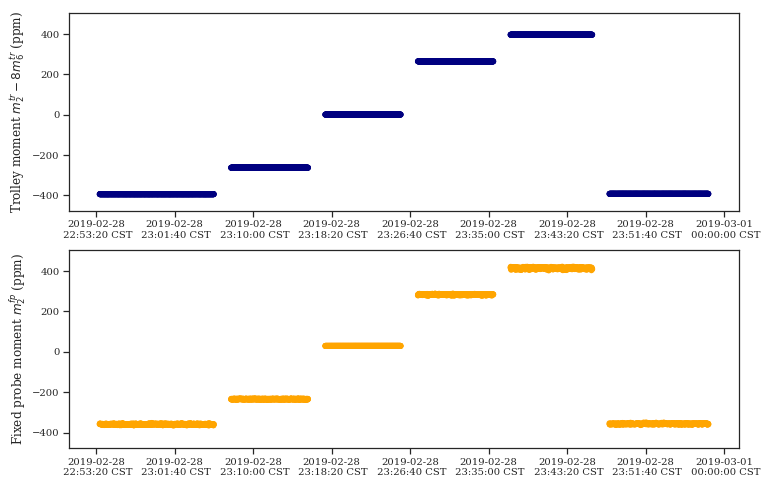

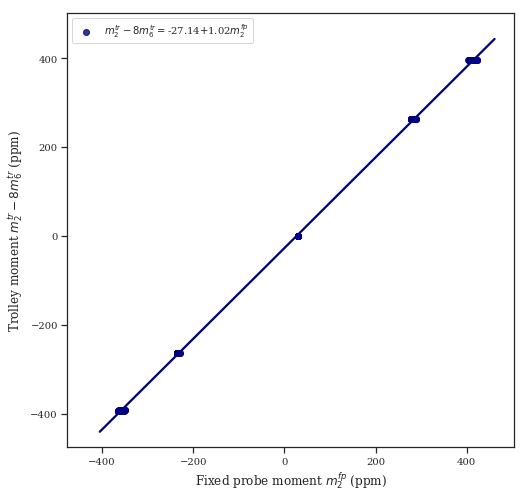

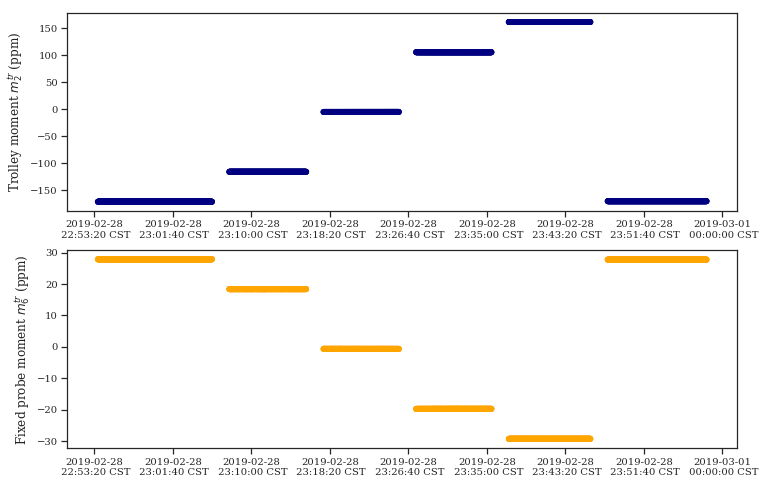

In [7]:
# plt.figure()
# sns.scatterplot(data=study_1_df['tr,m2'].iloc[3:]/61.79, edgecolor='none')
# fig=plt.gcf()
# fig.set_size_inches(12,4)
# ax = plt.gca()
# xticks = ax.get_xticks()
# _ = ax.set_xticklabels([pd.to_datetime(tm, unit='s').tz_localize('UTC').tz_convert('US/Central').strftime('%Y-%m-%d\n %H:%M:%S %Z') 
#                         for tm in xticks], rotation=0)

# plt.figure()
# sns.scatterplot(data=study_1_df['tr,m6'].iloc[3:]/61.79, edgecolor='none')
# fig=plt.gcf()
# fig.set_size_inches(12,4)
# ax = plt.gca()
# xticks = ax.get_xticks()
# _ = ax.set_xticklabels([pd.to_datetime(tm, unit='s').tz_localize('UTC').tz_convert('US/Central').strftime('%Y-%m-%d\n %H:%M:%S %Z') 
#                         for tm in xticks], rotation=0)

# plt.figure()
# sns.scatterplot(data=study_1_df['tr,m10'].iloc[3:]/61.79, edgecolor='none')
# fig=plt.gcf()
# fig.set_size_inches(12,4)
# ax = plt.gca()
# xticks = ax.get_xticks()
# _ = ax.set_xticklabels([pd.to_datetime(tm, unit='s').tz_localize('UTC').tz_convert('US/Central').strftime('%Y-%m-%d\n %H:%M:%S %Z') 
#                         for tm in xticks], rotation=0)

# plt.figure()
# sns.scatterplot(data=study_1_df['tr,m14'].iloc[3:]/61.79, edgecolor='none')
# fig=plt.gcf()
# fig.set_size_inches(12,4)
# ax = plt.gca()
# xticks = ax.get_xticks()
# _ = ax.set_xticklabels([pd.to_datetime(tm, unit='s').tz_localize('UTC').tz_convert('US/Central').strftime('%Y-%m-%d\n %H:%M:%S %Z') 
#                         for tm in xticks], rotation=0)

data_df = study_1_df.iloc[3:]/61.79
trolley_compound_df = (data_df['tr,m2'] - 8*data_df['tr,m6'])


fig1,axs = plt.subplots(2,1)
sns.scatterplot(data=trolley_compound_df, edgecolor='none', ax=axs[0], color='navy')
xticks = axs[0].get_xticks()
axs[0].set_xticklabels([pd.to_datetime(tm, unit='s').tz_localize('UTC').tz_convert('US/Central').strftime('%Y-%m-%d\n %H:%M:%S %Z') 
                        for tm in xticks], rotation=0)
sns.scatterplot(data=study_1_df['st30,m2'].iloc[3:]/61.79, edgecolor='none', ax=axs[1], color='orange')
xticks = axs[1].get_xticks()
axs[1].set_xticklabels([pd.to_datetime(tm, unit='s').tz_localize('UTC').tz_convert('US/Central').strftime('%Y-%m-%d\n %H:%M:%S %Z') 
                        for tm in xticks], rotation=0)

y_min = np.min([np.min(trolley_compound_df),
               np.min(study_1_df['st30,m2'].iloc[3:]/61.79)])
y_max = np.max([np.max(trolley_compound_df),
               np.max(study_1_df['st30,m2'].iloc[3:]/61.79)])
y_range = y_max - y_min
y_min = y_min - 0.1*y_range
y_max = y_max + 0.1*y_range

axs[0].set_ylabel(r'Trolley moment $m^{tr}_2-8m^{tr}_6$ (ppm)')
axs[0].set_ylim(y_min, y_max)
axs[1].set_ylabel(r'Fixed probe moment $m^{fp}_2$ (ppm)')
axs[1].set_ylim(y_min, y_max)
fig1.set_size_inches(12,8)

p_out = np.polyfit(study_1_df['st30,m2'].iloc[3:]/61.79, trolley_compound_df, 1)
fit_eq = r'$m^{tr}_2-8m^{tr}_6=$' + str('%.2f'%p_out[1]) + r'$+$' + str('%.2f'%p_out[0]) + r'$m^{fp}_2$'


fig2, axs2 = plt.subplots(1,1)
sns.regplot(x=study_1_df['st30,m2'].iloc[3:]/61.79, y=trolley_compound_df, ax=axs2, label=fit_eq, color='navy')
axs2.set_ylim(y_min, y_max)
axs2.set_xlim(y_min, y_max)
axs2.set_xlabel(r'Fixed probe moment $m^{fp}_2$ (ppm)')
axs2.set_ylabel(r'Trolley moment $m^{tr}_2-8m^{tr}_6$ (ppm)')
axs2.legend(prop={'size': 10})
fig2.set_size_inches(8,8)


fig3,axs3 = plt.subplots(2,1)
sns.scatterplot(data=data_df['tr,m2'], edgecolor='none', ax=axs3[0], color='navy')
xticks = axs3[0].get_xticks()
axs3[0].set_xticklabels([pd.to_datetime(tm, unit='s').tz_localize('UTC').tz_convert('US/Central').strftime('%Y-%m-%d\n %H:%M:%S %Z') 
                        for tm in xticks], rotation=0)
sns.scatterplot(data=data_df['tr,m6'], edgecolor='none', ax=axs3[1], color='orange')
xticks = axs3[1].get_xticks()
axs3[1].set_xticklabels([pd.to_datetime(tm, unit='s').tz_localize('UTC').tz_convert('US/Central').strftime('%Y-%m-%d\n %H:%M:%S %Z') 
                        for tm in xticks], rotation=0)

axs3[0].set_ylabel(r'Trolley moment $m^{tr}_2$ (ppm)')
axs3[1].set_ylabel(r'Fixed probe moment $m^{tr}_6$ (ppm)')
fig3.set_size_inches(12,8)

# fig1.savefig('compound.png',dpi=300)
# fig2.savefig('regression.png',dpi=300)
# fig3.savefig('quad-oct.png',dpi=300)


In [ ]:
offset = 1.5514e9
study_index = study_1_df.index

mask = (study_index > offset + 16500) & (study_index < offset + 16600)

In [ ]:
moment = 'tr,m1'

fg = sns.relplot(data=tr6267.moment_df[moment]/61.79, kind='line')
fig = plt.gcf()
for ax in fg.axes.flat:
    xticks = ax.get_xticks()
    ax.set_xticklabels([pd.to_datetime(tm, unit='s').tz_localize('UTC').tz_convert('US/Central').strftime('%Y-%m-%d\n %H:%M:%S %Z')
                        for tm in xticks], rotation=0)
fig.set_size_inches(12, 4)
plt.title(moment)
plt.ylabel('normalized moment (ppm)')
plt.tight_layout()
#plt.ylim(300,1300)

In [ ]:
plot_df = scc_moment_df[scc_moment_df.index > 1551435000]

fg = sns.relplot(data=plot_df['tr,m1']/61.79, kind='line')
fig = plt.gcf()
for ax in fg.axes.flat:
    xticks = ax.get_xticks()
    ax.set_xticklabels([pd.to_datetime(tm, unit='s').tz_localize('UTC').tz_convert('US/Central').strftime('%Y-%m-%d\n %H:%M:%S %Z')
                        for tm in xticks], rotation=0)
fig.set_size_inches(12, 4)
plt.title('tr,m1')
plt.ylabel('normalized moment (ppm)')
plt.tight_layout()

fg = sns.relplot(data=plot_df['st30,m1']/61.79, kind='line')
fig = plt.gcf()
for ax in fg.axes.flat:
    xticks = ax.get_xticks()
    ax.set_xticklabels([pd.to_datetime(tm, unit='s').tz_localize('UTC').tz_convert('US/Central').strftime('%Y-%m-%d\n %H:%M:%S %Z')
                        for tm in xticks], rotation=0)
fig.set_size_inches(12, 4)
plt.title('st30,m1')
plt.ylabel('normalized moment (ppm)')
plt.tight_layout()

In [ ]:
x = 'st30,m1'
y = 'tr,m1'

fig1 = plt.figure(1)
fg1 = sns.regplot(x=x, y=y, data=plot_df/61.79)
fig1 = plt.gcf()
plt.title(y+' vs. '+x)
fig1.set_size_inches(6,6)
plt.tight_layout()

fig2 = plt.figure(2)
fg2 = sns.residplot(x=x, y=y, data=plot_df/61.79)
fig2 = plt.gcf()
plt.title(y+' vs. '+x+' resid')
fig2.set_size_inches(6,6)
plt.tight_layout()

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(plot_df[x],
                                                                     plot_df[y])

print slope
print intercept
print r_value
print p_value
print std_err

In [ ]:
fg1 = sns.relplot(data=tr6267.moment_df['tr,m1']/61.79,kind='line')
fig1 = plt.gcf()
fig1.set_size_inches(12,3)

fg2 = sns.relplot(data=tr6267.moment_df['tr,m1']/61.79,kind='line')
fig2 = plt.gcf()
fig2.set_size_inches(12,5)

offset = 1.5514e9

plt.xlim(offset+21670,offset+21790)
plt.ylim(810,820)


# fig2 = sns.relplot(data=tr6271.moment_df['st30,m1']/61.79,kind='line')

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(12,8))
plt.subplots_adjust(hspace=.35)

st1 = 'st30,m2'
plot_df = tr6267.moment_df.loc[mask,st1]/61.79
fg1 = sns.relplot(data=plot_df, kind='scatter', edgecolor='none', ax=ax1)
ax1.set_xlabel('time')
ax1.set_ylabel(st1+' (ppm)')

st2 = 'tr,m10'
plot_df = tr6267.moment_df.loc[mask,st2]/61.79
fg2 = sns.relplot(data=plot_df, kind='scatter', edgecolor='none', ax=ax2)
ax2.set_xlabel('time')
ax2.set_ylabel(st2+' (ppm)')

plot_df = tr6267.moment_df.loc[mask,[st1,st2]]/61.79
fg3 = sns.regplot(x=st1, y=st2, data=plot_df, ax=ax3)

# plt.tight_layout()


slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(plot_df[st1],
                                                                     plot_df[st2])

print slope

# for ii in range(72):
#     st = 'st'+str(ii)+',m1'
#     plot_df = tr6267.moment_df.loc[mask,st]/61.79
#     fg = sns.relplot(data=plot_df, kind='scatter', edgecolor='none')
#     fig = plt.gcf()
#     fig.set_size_inches(12,3)
#     plt.title(st)
#     plt.xlabel('time')
#     plt.ylabel('ppm')
#     plt.tight_layout()
#     # fig.savefig("./run6267/run6267_st"+str(ii).zfill(2)+"_m1.png",dpi=300)
#     print '\r'+str(ii)

In [ ]:
fig3 = sns.regplot('tr,m1','st30,m1',data=tr6271.moment_df/61.79)

In [ ]:
#fig_out = tr6267.moment_time_plot(moment='tr,m1')
#fig_out.set_size_inches(12,5)

x_moment = 'st30,m1'
y_moment = 'st66,m1'

fig1 = tr6267.moment_time_plot('tr,m6')
fig1.set_size_inches(12,5)

fig2 = tr6267.moment_time_plot('st30,m1')
fig2.set_size_inches(12,5)

fig3 = tr6267.moment_time_plot('st66,m2')
fig3.set_size_inches(12,5)


In [ ]:
fig3 = tr6267.moment_correlation_plot(x_moment='tr,m1', y_moment='st30,m1')

In [ ]:
x_moment = 'tr,m1'
y_moment = 'st30,m1'

fig3 = tr6270.moment_correlation_plot(x_moment=x_moment, y_moment=y_moment)
fig3.show()

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(tr6270.moment_df[x_moment],
                                                                     tr6270.moment_df[y_moment])
print slope

In [ ]:
tr6267.moment_df.head()

In [ ]:
print str('%.2f'%p_out[1])